# Plot logging for two games

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def calculate_avg(history, avg_length):
    # Calculate start of every period
    start_period = [i for i in range(0,len(history)-1,avg_length)]
    # Calculate mean of the periods
    avg_period = [np.mean(history[start:start+avg_length]) for start in start_period]
    # Calculate mean episode of the periods
    episode = [i for i in range(avg_length//2, len(history), avg_length)]
    return episode, avg_period

## Set directory

Set the directory of the train run you want to visualize. It contains the following files:

* loss.pickle
* reward.pickle
* reward_clamped.pickle

In [10]:
sub_dir = 'Final_server'

In [11]:
# Build file names
# game 1
reward_file_game1 = sub_dir + '/reward_game1.pickle'
reward_clamped_file_game1 = sub_dir + '/reward_clamped_game1.pickle'
# game 2
reward_file_game2 = sub_dir + '/reward_game2.pickle'
reward_clamped_file_game2 = sub_dir + '/reward_clamped_game2.pickle'
# total scores
reward_file = sub_dir + '/reward.pickle'
reward_clamped_file = sub_dir + '/reward_clamped.pickle'

# Load files
# game 1
with open(reward_file_game1, 'rb') as fp:
    reward_history_game1 = pickle.load(fp)
with open(reward_clamped_file_game1, 'rb') as fp:
    reward_clamped_history_game1 = pickle.load(fp)
# game 2
with open(reward_file_game2, 'rb') as fp:
    reward_history_game2 = pickle.load(fp)
with open(reward_clamped_file_game2, 'rb') as fp:
    reward_clamped_history_game2 = pickle.load(fp)

# total scores
with open(reward_file, 'rb') as fp:
    reward_history = pickle.load(fp)
with open(reward_clamped_file, 'rb') as fp:
    reward_clamped_history = pickle.load(fp)

# Reward history

## Reward game 1

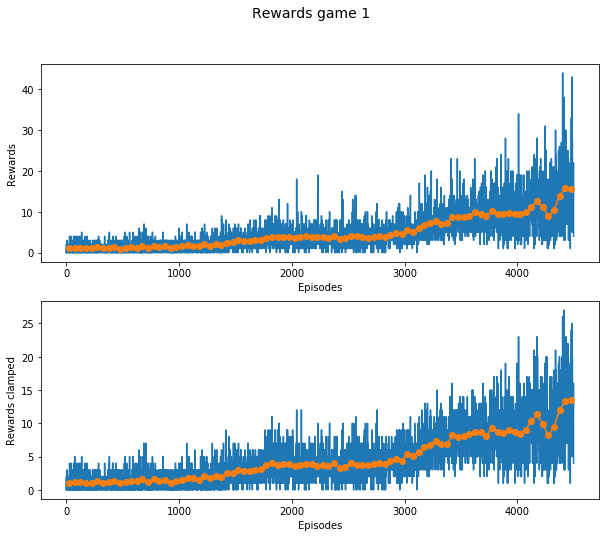

In [12]:
avg_period = 50

fig = plt.gcf()
fig.suptitle('Rewards game 1', fontsize=14)

plt.subplot(2, 1, 1)
plt.plot(reward_history_game1, '-')
episode, avg = calculate_avg(reward_history_game1, avg_length=avg_period)
plt.plot(episode, avg, 'o-')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

plt.subplot(2, 1, 2)
plt.plot(reward_clamped_history_game1, '-')
episode, avg = calculate_avg(reward_clamped_history_game1, avg_length=avg_period)
plt.plot(episode, avg, 'o-')
plt.xlabel('Episodes')
plt.ylabel('Rewards clamped')

plt.show()

## Reward game 2

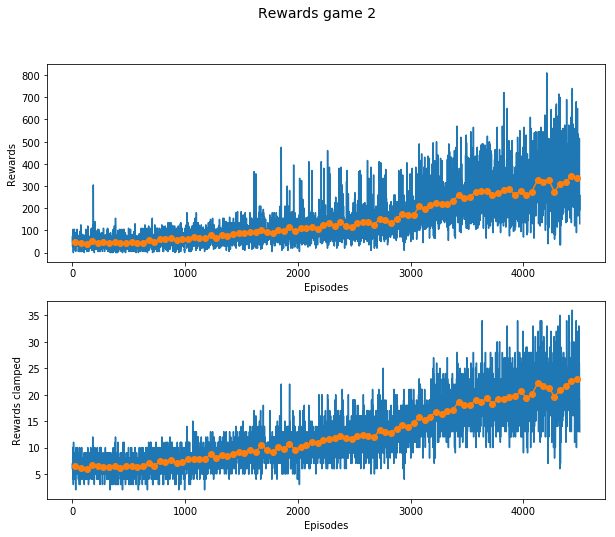

In [13]:
avg_period = 50

fig = plt.gcf()
fig.suptitle('Rewards game 2', fontsize=14)

plt.subplot(2, 1, 1)
plt.plot(reward_history_game2, '-')
episode, avg = calculate_avg(reward_history_game2, avg_length=avg_period)
plt.plot(episode, avg, 'o-')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

plt.subplot(2, 1, 2)
plt.plot(reward_clamped_history_game2, '-')
episode, avg = calculate_avg(reward_clamped_history_game2, avg_length=avg_period)
plt.plot(episode, avg, 'o-')
plt.xlabel('Episodes')
plt.ylabel('Rewards clamped')

plt.show()

## Total reward

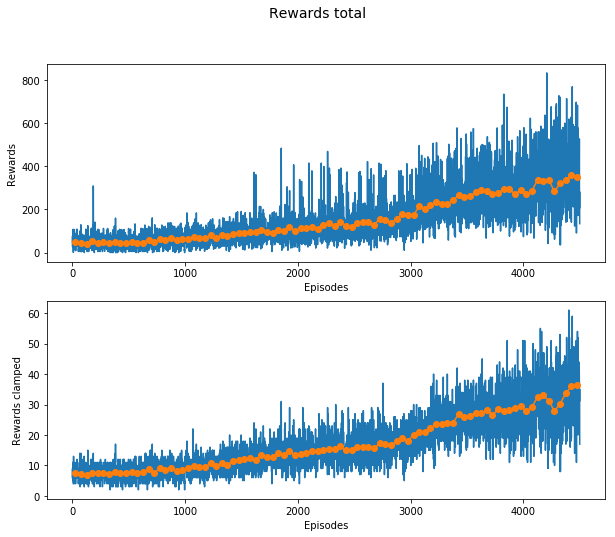

In [14]:
avg_period = 50

fig = plt.gcf()
fig.suptitle('Rewards total', fontsize=14)

plt.subplot(2, 1, 1)
plt.plot(reward_history, '-')
episode, avg = calculate_avg(reward_history, avg_length=avg_period)
plt.plot(episode, avg, 'o-')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

plt.subplot(2, 1, 2)
plt.plot(reward_clamped_history, '-')
episode, avg = calculate_avg(reward_clamped_history, avg_length=avg_period)
plt.plot(episode, avg, 'o-')
plt.xlabel('Episodes')
plt.ylabel('Rewards clamped')

plt.show()

# Unified Plot

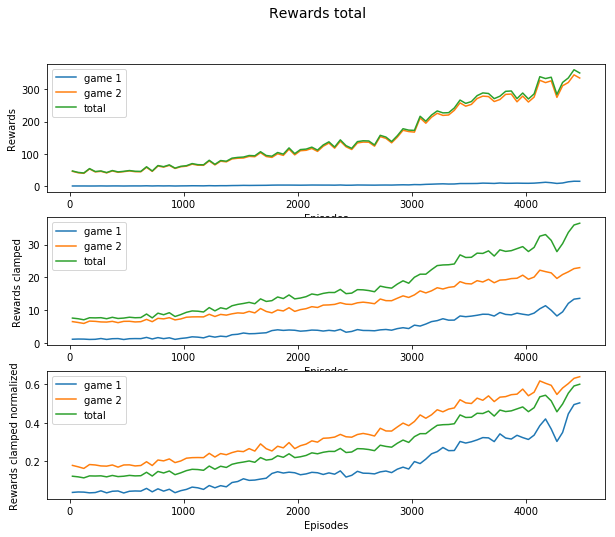

In [23]:
avg_period = 50

fig = plt.gcf()
fig.suptitle('Rewards total', fontsize=14)

plt.subplot(3, 1, 1)

# Game 1
episode, avg = calculate_avg(reward_history_game1, avg_length=avg_period)
plt.plot(episode, avg, label='game 1', linestyle='-')
# Game 2
episode, avg = calculate_avg(reward_history_game2, avg_length=avg_period)
plt.plot(episode, avg, label='game 2', linestyle='-')
# Total
episode, avg = calculate_avg(reward_history, avg_length=avg_period)
plt.plot(episode, avg, label='total', linestyle='-')

plt.legend(loc='best')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

plt.subplot(3, 1, 2)

# Game 1
episode, avg = calculate_avg(reward_clamped_history_game1, avg_length=avg_period)
plt.plot(episode, avg, label='game 1', linestyle='-')
# Game 2
episode, avg = calculate_avg(reward_clamped_history_game2, avg_length=avg_period)
plt.plot(episode, avg, label='game 2', linestyle='-')
# Total
episode, avg = calculate_avg(reward_clamped_history, avg_length=avg_period)
plt.plot(episode, avg, label='total', linestyle='-')

plt.legend(loc='best')
plt.xlabel('Episodes')
plt.ylabel('Rewards clamped')

plt.subplot(3, 1, 3)

# Game 1
episode, avg = calculate_avg(reward_clamped_history_game1, avg_length=avg_period)
avg /= max(reward_clamped_history_game1)
plt.plot(episode, avg, label='game 1', linestyle='-')
# Game 2
episode, avg = calculate_avg(reward_clamped_history_game2, avg_length=avg_period)
avg /= max(reward_clamped_history_game2)
plt.plot(episode, avg, label='game 2', linestyle='-')
# Total
episode, avg = calculate_avg(reward_clamped_history, avg_length=avg_period)
avg /= max(reward_clamped_history)
plt.plot(episode, avg, label='total', linestyle='-')

plt.legend(loc='best')
plt.xlabel('Episodes')
plt.ylabel('Rewards clamped normalized')

plt.show()

In [22]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'] )

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
